#This only Includes Logistic Regression

In [3]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('titanic_train.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info() ##Cabin has Null Values: only 204 values
#Age has only 714, although proportion is low

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

In [15]:
df.isnull() #returns T/F of null values can plot visually

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

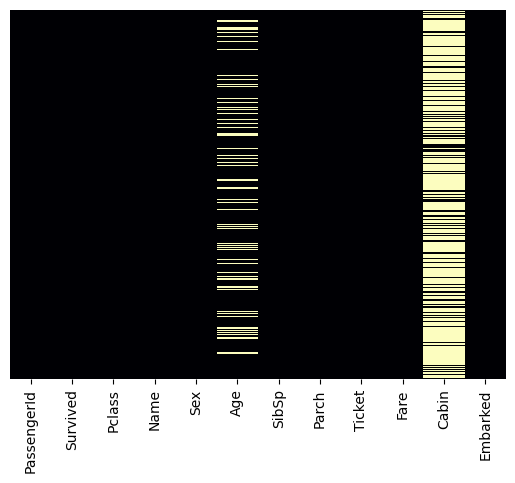

In [35]:
sns.heatmap(df.isnull() , cbar = False,  yticklabels= False,cmap = "magma")
##each data point shows yellow implies null

<Axes: xlabel='Survived', ylabel='count'>

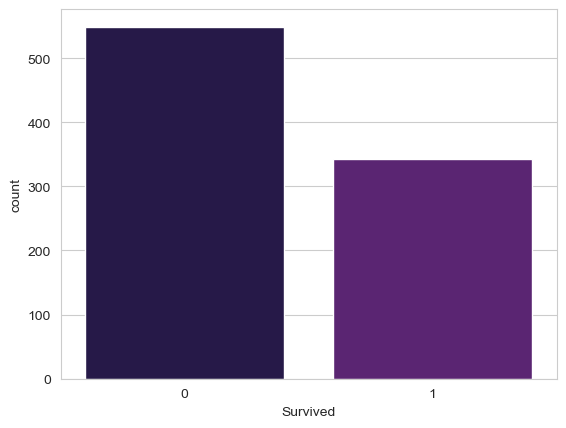

In [51]:
##Checking Relation with Respect to Y Survived
sns.set_palette(palette = "magma")
sns.set_style(style = "whitegrid")
sns.countplot(df, x = 'Survived', hue = 'Survived',legend = False)

<Axes: xlabel='Pclass', ylabel='count'>

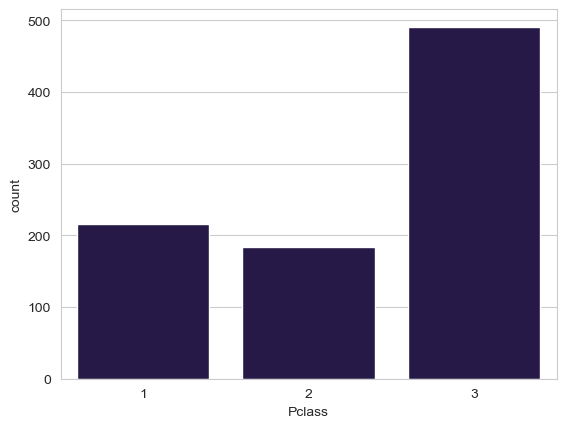

In [61]:
##Passenger Class
sns.countplot(df, x = 'Pclass')  # majority passenger were third class, low income class
# sns.countplot(df, x = 'Survived', hue = 'Pclass') 
##However still out of total females there were more likely to survive why (the policy was boat for ladies & children)

<Axes: xlabel='Survived', ylabel='count'>

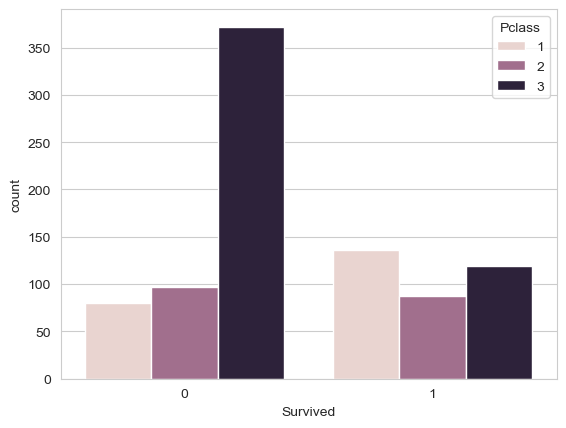

In [63]:
##Sex Impact
sns.countplot(df, x = 'Survived', hue = 'Pclass') 
##Although low class passenger were high & so was their chance of not being able to survive
##First Class comparatively more likely survived

<Axes: xlabel='Age', ylabel='Count'>

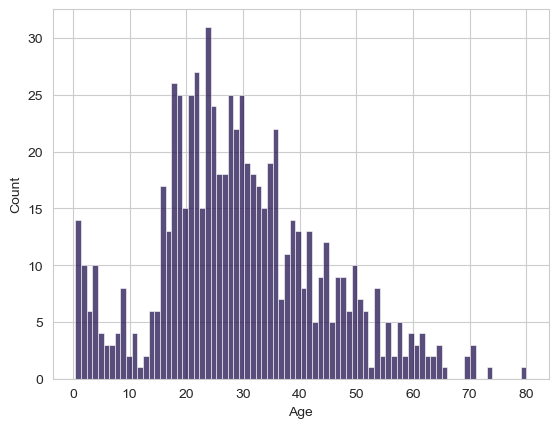

In [81]:
##Age Distribution
sns.histplot(df, x = 'Age', bins = 80) ##majority population b/w 20-40
##less number of children

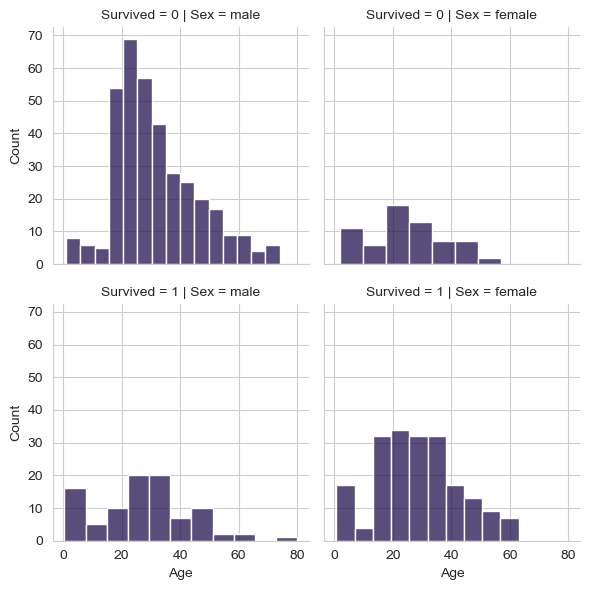

In [93]:
gh=sns.FacetGrid(df, col = 'Sex', row = 'Survived')
gh.map(sns.histplot, 'Age') #Majority males were non-survivors, majority 20-40
#Females less like to not survived

<Axes: xlabel='SibSp', ylabel='count'>

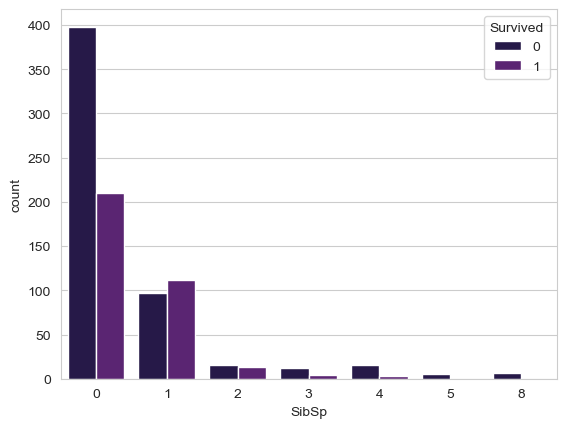

In [97]:
sns.countplot(df, x = 'SibSp', hue = 'Survived' ) 	
#Majority member were travelling alone, that is neither spouse nor sibling

<Axes: xlabel='Parch', ylabel='count'>

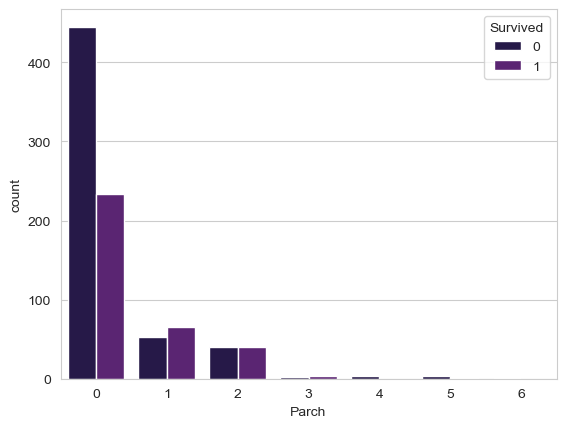

In [99]:
sns.countplot(df, x = 'Parch', hue = 'Survived' ) 
#Majority member were travelling alone with Parent & Children 
##as this confirms as well small number children

<Axes: xlabel='Fare', ylabel='Count'>

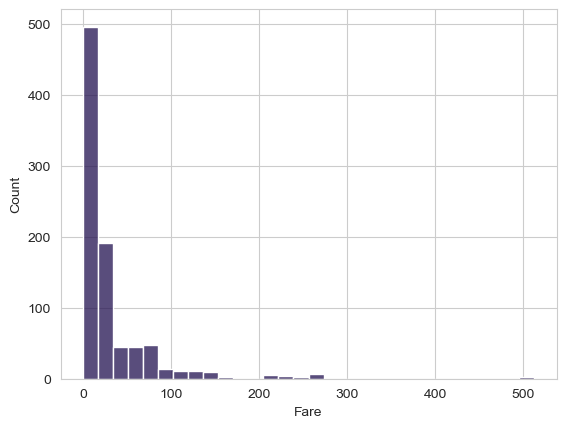

In [103]:
##Fare
##Since majority were class 3 that is why fare price majority in 0 to 20
sns.histplot(df, x = 'Fare', bins = 30)
##as this confirms as well small number children

<Axes: xlabel='Embarked', ylabel='count'>

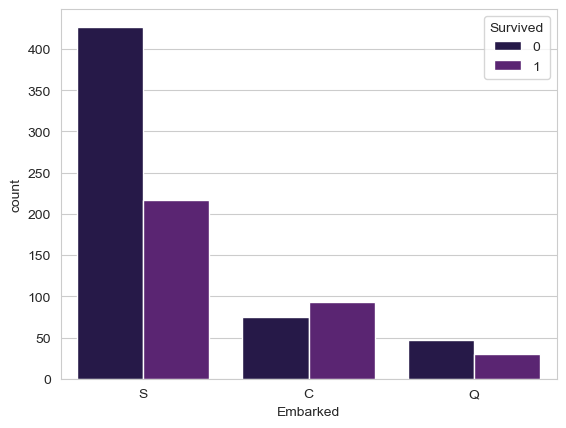

In [107]:
df.head()
sns.countplot(df, x = 'Embarked', hue = 'Survived')  ##First stop was Southampton that is why maimum passenger in embarked as S
## Q was the last stop before titanic met with tragic accident

In [109]:
##For Interactive Plots
import cufflinks.offline as cfs

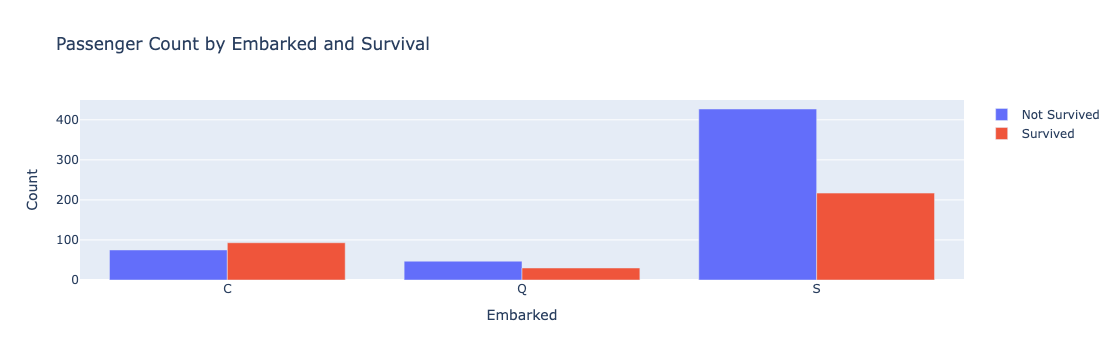

In [155]:
cfs.go_offline()
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# Group the data
grouped = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Create Plotly Bar traces
trace0 = go.Bar(
    x=grouped.index,
    y=grouped[0],
    name='Not Survived'
)

trace1 = go.Bar(
    x=grouped.index,
    y=grouped[1],
    name='Survived'
)

# Create layout and plot
layout = go.Layout(
    barmode='group',
    title='Passenger Count by Embarked and Survival',
    xaxis=dict(title='Embarked'),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=[trace0, trace1], layout=layout)
iplot(fig)

# Null Data Treatment

<Axes: >

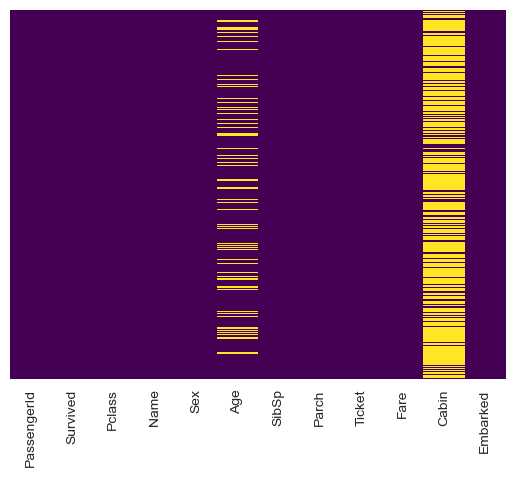

In [174]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=  False,cmap = "viridis")

In [188]:
##Age: #Can impute value based on class as Pclass, Sex

<Axes: xlabel='Sex', ylabel='Age'>

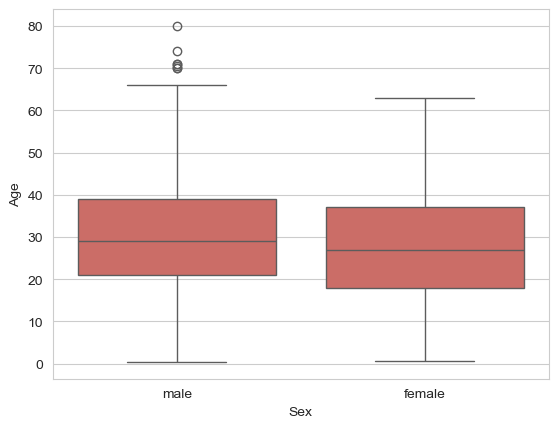

In [186]:
sns.set_palette(palette=  "hls")
sns.boxplot(df, x = 'Sex', y = 'Age') ## roughly same female as low median age

<Axes: xlabel='Pclass', ylabel='Age'>

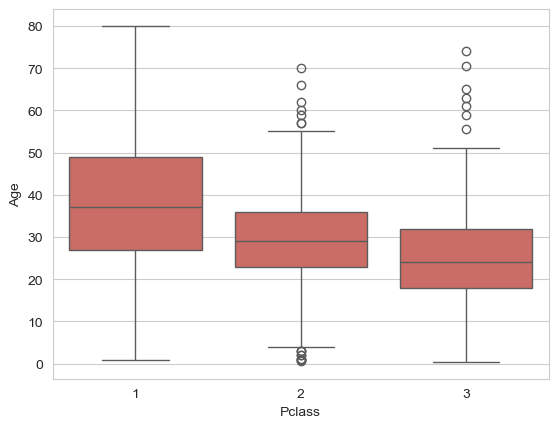

In [190]:
sns.set_palette(palette=  "hls")
sns.boxplot(df, x = 'Pclass', y = 'Age') ## there is sig difference based of pclass using that to impute null values

In [9]:
avg_age = df.groupby(['Pclass'])['Age'].mean().round()

In [11]:
def age_input(Age, Pclass):
    if np.isnan(Age):
        if Pclass == 1:
            return avg_age[1]
        elif Pclass == 2:
            return avg_age[2]
        else:
            return avg_age[3]
    else:
        return Age

In [368]:
%%timeit
df.apply(lambda row: age_input(row['Age'], row['Pclass']), axis=1).isnull().all()
# df[['Pclass']].isnull()
##this pass each row value as a single input

2.98 ms ± 76.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [354]:
# df['Age'] = df.apply(lambda row: age_input(row['Age'], row['Pclass']), axis=1)

In [13]:
%%timeit
def fill_age(row):
    if pd.isnull(row['Age']):
        return avg_age[row['Pclass']]
    return row['Age']

df['Age'] = df.apply(fill_age, axis=1)

2.63 ms ± 18.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
df['Age'].isnull().any()

False

In [17]:
##Cabin column has mostly null, so dropping it

df.drop('Cabin', axis = 1, inplace = True)

In [406]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [390]:
##Since some categorical Column

##Ideal is to conver the Column into numeric categories
##Get_dummies for nominal data that has no natural ordering like country, state
pd.get_dummies(df['Sex']) 
##It return two column True & False. One would be able to predicting the other resulting in MULTICOLLINEARITY
# Ideal you can drop first column & keep rest , even if more than two categories
##Can specify dtype to be int so that can be used in model

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [19]:
sex = pd.get_dummies(df['Sex'],drop_first= True, dtype = 'int' )
Embarked = pd.get_dummies(df['Embarked'],drop_first= True, dtype = 'int' )

In [398]:
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
df.columns
df_train = pd.concat([df[['Survived', 'Pclass',  'Age', 'SibSp','Parch','Fare']],sex,Embarked],axis = 1)

In [424]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [426]:
# df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
##Train & Validation split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
##Splitting Data in X & Y

Y = df_train.loc[:, df_train.columns.isin(['Survived'])]['Survived']
X = df_train.loc[:, ~df_train.columns.isin(['Survived'])]

In [29]:
X.head()
# Y

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [31]:
X_train, X_VAL, y_train, y_VAL = train_test_split(X, Y, test_size=0.3, random_state= 101)

In [33]:
logit = LogisticRegression(max_iter=1000)

In [467]:
logit.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [479]:
pred_val = logit.predict(X_VAL)

In [475]:
logit.classes_

array([0, 1])

In [660]:
logit.predict_proba(X_VAL)[0:10] ##Probability estimate of 0 & 1 class of survived (as per __classes

array([[0.69465858, 0.30534142],
       [0.0223759 , 0.9776241 ],
       [0.48780684, 0.51219316],
       [0.82122913, 0.17877087],
       [0.79937318, 0.20062682],
       [0.94824978, 0.05175022],
       [0.62575451, 0.37424549],
       [0.89103954, 0.10896046],
       [0.13333002, 0.86666998],
       [0.37989176, 0.62010824]])

In [81]:
from sklearn import metrics

In [493]:
##Confusion Matrix
metrics.confusion_matrix(y_VAL, pred_val)

                ##PREDICTED
                # =0     =1
#Actual =0
        # =1

array([[135,  19],
       [ 37,  77]])

In [499]:
print(metrics.classification_report(y_VAL, pred_val))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



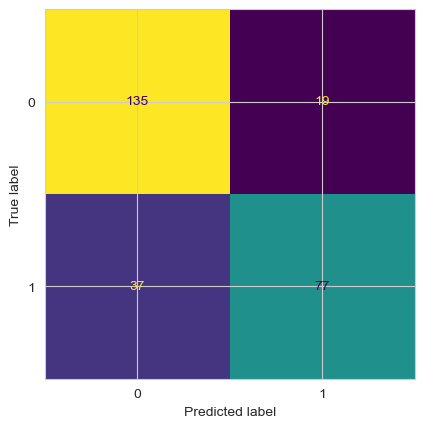

In [491]:
metrics.ConfusionMatrixDisplay.from_predictions(y_VAL, pred_val, colorbar= False, )

In [503]:
metrics.accuracy_score(y_VAL, pred_val)

0.7910447761194029

In [509]:
metrics.f1_score(y_VAL, pred_val)

0.7333333333333333

In [511]:
metrics.precision_score(y_VAL, pred_val)

0.8020833333333334

In [513]:
metrics.recall_score(y_VAL, pred_val)

0.6754385964912281

In [515]:
77/(77+37)

0.6754385964912281

In [517]:
77/(77+19)

0.8020833333333334

# Model Improvements

In [111]:
#Scaling the Continuus as variable, as Logistic Regression 
#can set higher value to variable because of it's high value & not necessary actual importance
from sklearn.preprocessing import StandardScaler


In [135]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,1,30.0,0,0,93.5000,0,0,1
510,3,29.0,0,0,7.7500,1,1,0
446,2,13.0,0,1,19.5000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
691,3,4.0,0,1,13.4167,0,0,0


In [161]:
X[['Age','Fare']]

X_ntr = X.loc[:, ~X.columns.isin(['Age','Fare'])]

X_tr = StandardScaler().fit_transform(X[['Age','Fare']])

In [159]:
X_Tr_df = pd.DataFrame(X_tr,columns = ['Age_tr','Fare_tr'])

In [141]:
X_ntr.groupby(['SibSp']).size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [147]:
X_ntr.groupby(['Parch']).size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [149]:
X_ntr

,Pclass,SibSp,Parch,male,Q,S,Sib_Spous_Parent_Child
0,3,1,0,1,0,1,1
1,1,1,0,0,0,0,1
2,3,0,0,0,0,1,0
3,1,1,0,0,0,1,1
4,3,0,0,1,0,1,0
...,...,...,...,...,...,...,...
886,2,0,0,1,0,1,0
887,1,0,0,0,0,1,0
888,3,1,2,0,0,1,3
889,1,0,0,1,0,0,0


In [171]:
##Feature Enginerring
##Family Member Created one column

X_ntr['Sib_Spous_Parent_Child'] = X_ntr.loc[:,'SibSp'] + X_ntr['Parch']
#[['SibSp','Parch']].apply(sum, axis = 1) #+ X_ntr['Parch']

/var/folders/l3/f7hpz30s08nbzkwqz28bhvnr0000gn/T/ipykernel_84717/3641733616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ntr['Sib_Spous_Parent_Child'] = X_ntr.loc[:,'SibSp'] + X_ntr['Parch']


In [173]:
X_ntr.drop(columns= ['SibSp','Parch'], inplace=True, axis = 1)

/var/folders/l3/f7hpz30s08nbzkwqz28bhvnr0000gn/T/ipykernel_84717/2928204716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ntr.drop(columns= ['SibSp','Parch'], inplace=True, axis = 1)


In [175]:
X_ntr.head()

,Pclass,male,Q,S,Sib_Spous_Parent_Child
0,3,1,0,1,1
1,1,0,0,0,1
2,3,0,0,1,0
3,1,0,0,1,1
4,3,1,0,1,0


In [177]:
X_ntr.groupby(['Sib_Spous_Parent_Child']).size()

Sib_Spous_Parent_Child
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
dtype: int64

In [179]:
def family_bucket(x):
    if x['Sib_Spous_Parent_Child'] == 0:
        val ="0"
    elif x['Sib_Spous_Parent_Child'] <= 2:
        val = "1-2"
    else:
        val = "3 and above"

    return val

In [181]:
X_ntr['Family_bucket'] = X_ntr.apply(family_bucket,axis = 1)

/var/folders/l3/f7hpz30s08nbzkwqz28bhvnr0000gn/T/ipykernel_84717/2567219605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ntr['Family_bucket'] = X_ntr.apply(family_bucket,axis = 1)


In [183]:
X_ntr.groupby('Family_bucket').size()

Family_bucket
0              537
1-2            263
3 and above     91
dtype: int64

In [185]:
##Nominal Encoding for Family Variable
fmly = pd.get_dummies(X_ntr['Family_bucket'], columns= ['Family_bucket'],dtype = int,drop_first= True)


In [187]:
#Also, do nominal ordering pClass

Pclass = pd.get_dummies(X_ntr['Pclass'], columns= ['Family_bucket'],dtype = int,drop_first= True)

In [189]:
Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [195]:
X= pd.concat([X_Tr_df,X_ntr.loc[:, X_ntr.columns.isin(['male','Q','S'])],Pclass,fmly],axis =1)

In [197]:
X

,Age_tr,Fare_tr,male,Q,S,2,3,1-2,3 and above
0,-0.550185,-0.502445,1,0,1,0,1,1,0
1,0.661499,0.786845,0,0,0,0,0,1,0
2,-0.247264,-0.488854,0,0,1,0,1,0,0
3,0.434308,0.420730,0,0,1,0,0,1,0
4,0.434308,-0.486337,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,-0.171534,-0.386671,1,0,1,1,0,0,0
887,-0.777375,-0.044381,0,0,1,0,0,0,0
888,-0.322994,-0.176263,0,0,1,0,1,0,1
889,-0.247264,-0.044381,1,0,0,0,0,0,0


In [193]:
X.columns = X.columns.astype(str)

In [681]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X, Y, test_size=  0.3, random_state= 101)

In [646]:
##Logistic Regression

model_new = LogisticRegression().fit(X_train, y_train)

pred_y_new = model_new.predict(X_val)

In [648]:
metrics.accuracy_score(y_val, pred_y_new)

0.7985074626865671

In [650]:
metrics.precision_score(y_val, pred_y_new)

0.8333333333333334

In [652]:
metrics.recall_score(y_val, pred_y_new)

0.6578947368421053

In [654]:
metrics.f1_score(y_val, pred_y_new)

0.7352941176470589

In [656]:
pred_y_new_TRAIN = model_new.predict(X_train)

In [658]:
metrics.accuracy_score(y_train, pred_y_new_TRAIN)

0.812199036918138

# Parameter Tuning

In [677]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to try
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' if using solver='liblinear'
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

logreg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')  # optimize for F1-score
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best F1-score:", grid.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score: 0.7180363138913071


In [679]:
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')  # optimize for F1-score
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best accuracy-score:", grid.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score: 0.8042322580645163


In [683]:
##Feature changes

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')  # optimize for F1-score
grid.fit(X_train_new, y_train_new)

print("Best parameters:", grid.best_params_)
print("Best F1-score:", grid.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score: 0.7180363138913071


In [685]:
##Feature changes

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')  # optimize for F1-score
grid.fit(X_train_new, y_train_new)

print("Best parameters:", grid.best_params_)
print("Best Acurracy-score:", grid.best_score_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Acurracy-score: 0.8042322580645163


In [687]:
##One Last Adjustment Pclass used instead of Nominal ordinal ordering

In [61]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_train['Pclass_ord'] = encoder.fit_transform(df_train[['Pclass']])

In [705]:
df['Pclass_ord'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass_ord
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [707]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_ord
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.0


In [63]:
Y_o = df_train.loc[:, df_train.columns.isin(['Survived'])]['Survived']
# X = 
X_o = df_train.loc[:, ~df_train.columns.isin(['Survived', 'Pclass','Ticket','Name','PassengerId'])]

In [65]:
X_train_o, X_VAL_o, y_train_o, y_VAL_o = train_test_split(X_o, Y_o, test_size=0.3, random_state= 101)

In [73]:
model_new_l = LogisticRegression(max_iter= 1000).fit(X_train_o,y_train_o)

In [79]:
pred_val_new_l = model_new_l.predict(X_VAL_o)

In [109]:
print( "Accuracy of Ordinal Addition: ", round(metrics.accuracy_score(y_VAL_o,pred_val_new_l) * 100), "%")
print( "F1-Score of Ordinal Addition: ", round(metrics.f1_score(y_VAL_o,pred_val_new_l) * 100), "%")
print( "Precision-Score of Ordinal Addition: ", round(metrics.precision_score(y_VAL_o,pred_val_new_l) * 100), "%")
print( "Recall-Score of Ordinal Addition: ", round(metrics.recall_score(y_VAL_o,pred_val_new_l) * 100), "%")
print( "Mis Classification-Error", round((1-metrics.accuracy_score(y_VAL_o,pred_val_new_l)) * 100), "%")

Accuracy of Ordinal Addition:  79 %
F1-Score of Ordinal Addition:  73 %
Precision-Score of Ordinal Addition:  80 %
Recall-Score of Ordinal Addition:  68 %
Mis Classification-Error 21 %


In [201]:
X_f = pd.concat([X_Tr_df,X_ntr.loc[:, X_ntr.columns.isin(['male','Q','S', 'Pclass'])],fmly],axis =1)
X_f['Pclass_ord'] = encoder.fit_transform(df_train[['Pclass']])

In [209]:
X_ff = X_f.loc[:, ~X_f.columns.isin(['Pclass'])]

In [219]:
X_train_oo, X_VAL_oo, y_train_oo, y_VAL_oo = train_test_split(X_ff, Y_o, test_size=0.3, random_state= 101)

In [221]:
model_new_l_l = LogisticRegression(max_iter= 1000).fit(X_train_oo,y_train_oo)

In [233]:
X_train_oo.head()
pred_val_new_l_l = model_new_l_l.predict(X_VAL_oo)

In [235]:
print( "Accuracy of Ordinal Addition: ", round(metrics.accuracy_score(y_VAL_oo,pred_val_new_l_l) * 100), "%")
print( "F1-Score of Ordinal Addition: ", round(metrics.f1_score(y_VAL_oo,pred_val_new_l_l) * 100), "%")
print( "Precision-Score of Ordinal Addition: ", round(metrics.precision_score(y_VAL_oo,pred_val_new_l_l) * 100), "%")
print( "Recall-Score of Ordinal Addition: ", round(metrics.recall_score(y_VAL_oo,pred_val_new_l_l) * 100), "%")
print( "Mis Classification-Error", round((1-metrics.accuracy_score(y_VAL_oo,pred_val_new_l_l)) * 100), "%")

Accuracy of Ordinal Addition:  79 %
F1-Score of Ordinal Addition:  74 %
Precision-Score of Ordinal Addition:  81 %
Recall-Score of Ordinal Addition:  68 %
Mis Classification-Error 21 %
